In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.pyplot import cm
n = 30
color = cm.Blues(np.linspace(0, 1, n))
color2 = cm.Reds(np.linspace(0, 1, n))
plt.style.use('presentation.mplstyle')

%matplotlib widget

In [16]:
plt.close('all')
coeff = 2*np.pi*5e-4
Fmax = 1e-6
Km = 1e-4
Fmax *= (3600*24)
bp = 239

In [3]:
def make_rho(rho0,c):
    def rho(x,t):
        return(rho0*1/(1+np.exp(np.exp(x-c*t))))
    return(rho)

In [4]:
def find_integral(rho0,c,C0,plot = True):
    rho_f = make_rho(rho0,c)
    max_xs = 25
    nxs = 1000
    xs = np.linspace(0,max_xs,nxs)
    maxt = 28
    ts = np.linspace(0,maxt,n)
#     if plot:
#         fig,ax = plt.subplots()

#         for i,t in enumerate(ts):
#             y = rho_f(xs,t)
#             ax.plot(xs,y,c=color[i])
    def make_model(x):
        def model(y,t):
            rho = rho_f(x,t)
            dydt = -coeff*rho*Fmax*y/(Km+y)/bp
            # dydt = -coeff*rho*Fmax*y

            return dydt
        return(model)
    Cs = []


    for x in xs:
        model = make_model(x)
        C = odeint(model,C0,ts)
        Cs.append(C)
    Cs = np.array(Cs)
    if plot:
    
        fig,ax = plt.subplots()
        ax2=ax.twinx()
        ratio = 4 
        for i,t in enumerate(ts[::ratio]):
            ax2.plot(xs,Cs[:,ratio*i],c=color2[ratio*i])
            y = rho_f(xs,t)
            ax.plot(xs,y,c=color[ratio*i])
        ax.set_ylabel(r'density $\rho$ $(cm.cm^{-3})$',color='blue')
        ax.set_xlabel('distance $(cm)$')
        
        ax.tick_params(axis = 'y',colors = 'blue')
        ax2.set_ylabel('P concentration $C$ $(\mu mo .cm^{-3})$',color='red')
        ax2.tick_params(axis = 'y',colors = 'red')    
        plt.tight_layout()
        fig,ax = plt.subplots()
        for i,t in enumerate(ts[::ratio]):
            y =Cs[:,ratio*i][:,0]
            ax.plot(xs,coeff*rho_f(xs,t)*Fmax*y/(Km+y),c=color[ratio*i])
        ax.set_xlabel('distance $(cm)$')
        ax.set_ylabel('absorption rate $(\mu mol.cm^{-3}.s^{-1})$',color='blue')
        plt.tight_layout()
    integrals = []
    for i,t in enumerate(ts):
        y =Cs[:,i][:,0]
        curve = coeff*rho_f(xs,t)*Fmax*y/(Km+y)
        integrals.append(2*np.pi*np.sum(curve*xs)*max_xs/nxs)
    if plot:
        fig,ax = plt.subplots()
        ax.plot(ts,integrals)
        ax.set_xlabel('time (day)')
        ax.set_ylabel('Colony absorption rate$(\mu mol.s^{-1})$')
        plt.tight_layout()
    return(integrals)

In [5]:
couples = [(260,1300),(240,2100),(200,3000)]
couples_units = [(c*1e-4*24,(rho_0*1e-3)**2*1e2/2) for (c,rho_0) in couples]

In [6]:
strains = ['A5','C2','Agg']


C:\Users\coren\AppData\Local\Temp\ipykernel_23228\1276023200.py:3: RuntimeWarning: overflow encountered in exp
  return(rho0*1/(1+np.exp(np.exp(x-c*t))))


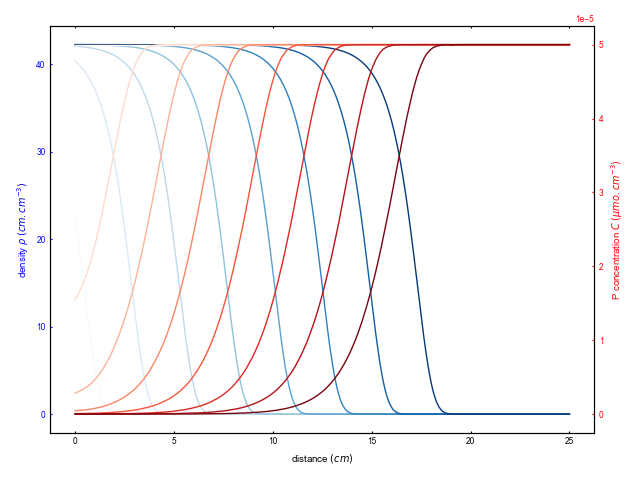

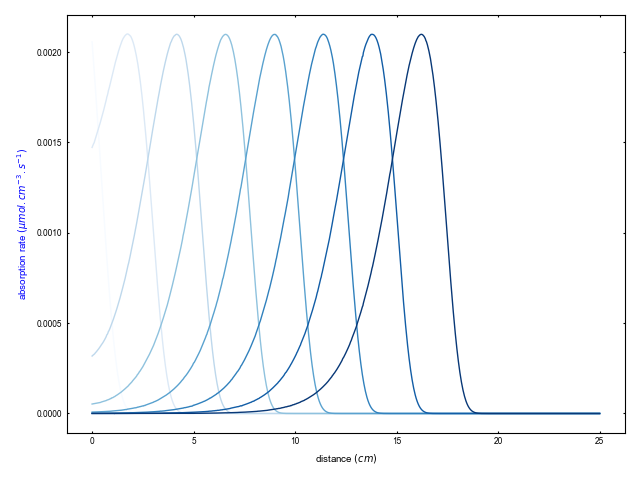

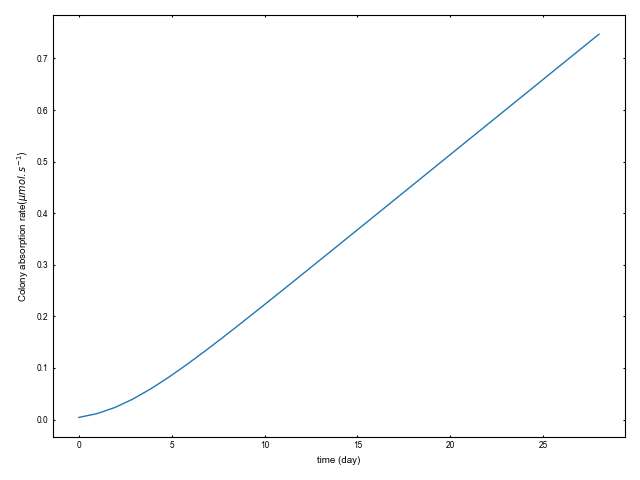

In [7]:
c,rho0 = couples_units[0]
C0=1e-3
# for rho0 in [1e2,2e2,3e2]:
# for c in [0.2,0.3,0.4]:
C0s = [5e-5,5e-4,1e-3,5e-3]
integrals_limit_list = []
for C0 in C0s:
    integrals_limit = []
    
    for (c,rho0) in couples_units:
        integrals_limit.append(np.mean(find_integral(rho0,c,C0,plot=True)))
        break        
    integrals_limit_list.append(integrals_limit)
    break

In [8]:
C0= 5e-4
integrals_limit = []

for (c,rho0) in couples_units:
    integrals_limit.append(find_integral(rho0,c,C0,plot=False))


C:\Users\coren\AppData\Local\Temp\ipykernel_23228\1276023200.py:3: RuntimeWarning: overflow encountered in exp
  return(rho0*1/(1+np.exp(np.exp(x-c*t))))


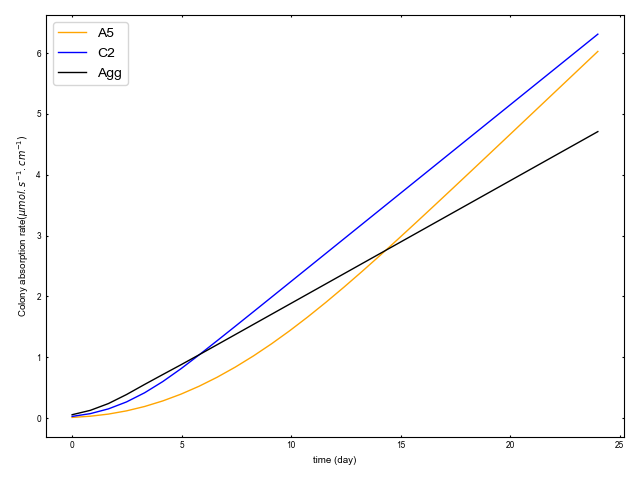

In [9]:
fig,ax = plt.subplots()
maxt = 24
ts = np.linspace(0,maxt,n)
colors = ['orange','blue','black']
for j,(c,rho0) in enumerate(couples_units):
    ax.plot(ts,integrals_limit[j],label=strains[j],color = colors[j])
    # ax.plot(ts,integrals_limit[j],color = colors[j])
    
ax.legend()
ax.set_xlabel('time (day)')
ax.set_ylabel('Colony absorption rate$(\mu mol.s^{-1}.cm^{-1})$')
plt.tight_layout()

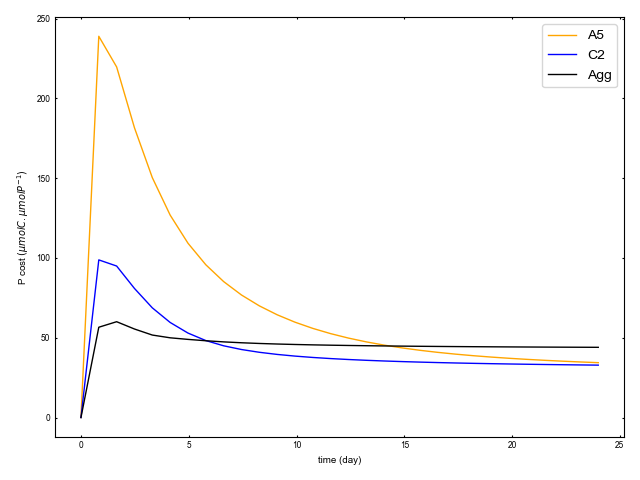

In [10]:
fig,ax = plt.subplots()
maxt = 24
ts = np.linspace(0,maxt,n)
colors = ['orange','blue','black']
rs = [4e-4,3.5e-4,3e-4]

biovolumes = (rho0*np.pi *rs[j]**2*c*ts*2*np.pi) #cm3
biomasses = biovolumes*1e-3 #kg
dry_biomasses = 0.3*biomasses #kg
C_mass = dry_biomasses*0.9 #kg C
C_mol = C_mass/(12e-3) #mol
C_mol = C_mol*1e6 #umol
for j,(c,rho0) in enumerate(couples_units):
    # ax.plot(ts,integrals_limit[j],label=strains[j],color = colors[j])
    ax.plot(ts,C_mol/integrals_limit[j],label=strains[j],color = colors[j])
    
ax.legend()
ax.set_xlabel('time (day)')
ax.set_ylabel('P cost $(\mu molC.\mu molP^{-1})$')
plt.tight_layout()

In [11]:
C0s = [1e-4,5e-4,5e-3]
integrals_limit_list = []
costs_limit_list = []
rs = [4e-4,3.5e-4,3e-4]

for C0 in C0s:
    integrals_limit = []
    costs_limit = []
    for j,(c,rho0) in enumerate(couples_units):
        integral = find_integral(rho0,c,C0,plot=False)
        integrals_limit.append(np.mean(integral))
        biovolumes = (rho0*np.pi *rs[j]**2*c*ts*2*np.pi) #cm3
        biomasses = biovolumes*1e-3 #kg
        dry_biomasses = 0.3*biomasses #kg
        C_mass = dry_biomasses*0.9 #kg C
        C_mol = C_mass/(12e-3) #mol
        C_mol = C_mol*1e6 #umol
        costs_limit.append(np.mean(C_mol/integral))
        
    integrals_limit_list.append(integrals_limit)
    costs_limit_list.append(costs_limit)

C:\Users\coren\AppData\Local\Temp\ipykernel_23228\1276023200.py:3: RuntimeWarning: overflow encountered in exp
  return(rho0*1/(1+np.exp(np.exp(x-c*t))))


Text(0, 0.5, 'Mean colony absorption rate (rescaled)')

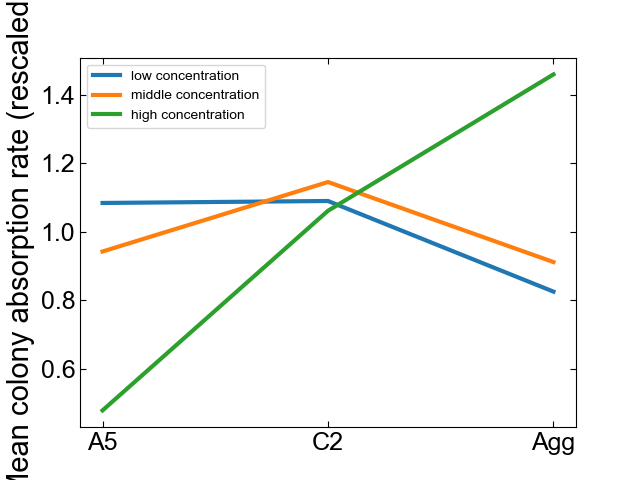

In [17]:
fig,ax = plt.subplots()
labels = ['low concentration','middle concentration','high concentration']
for j,C0 in enumerate(C0s):
    ax.plot(strains,np.array(integrals_limit_list[j])/np.mean(integrals_limit_list[j]),label=labels[j])
    
    # ax.plot(strains,np.array(integrals_limit_list[j])/np.mean(integrals_limit_list[j]),label=f'$C_0 =$ {C0} $ \mu mol.cm^{-3}$')
ax.legend()
ax.set_ylabel('Mean colony absorption rate (rescaled)')


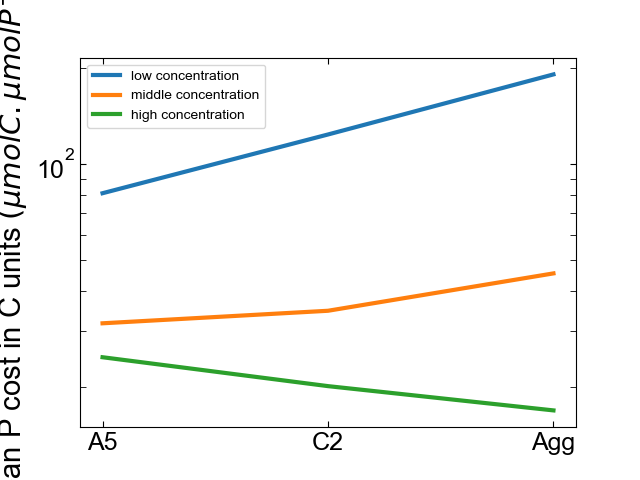

In [18]:
fig,ax = plt.subplots()

for j,C0 in enumerate(C0s):
    ax.plot(strains,np.array(costs_limit_list[j]),label=labels[j])
    
    # ax.plot(strains,np.array(costs_limit_list[j]),label=f'$C_0 =$ {C0} $ \mu mol.cm^{-3}$')
ax.legend()
ax.set_ylabel('Mean P cost in C units $(\mu molC.\mu molP^{-1})$')
ax.set_yscale('log')

Text(0, 0.5, 'Mean colony absorption rate (rescaled)')

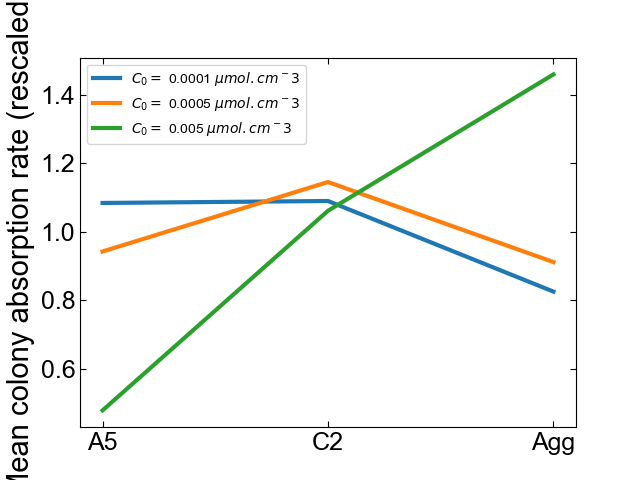

In [19]:
fig,ax = plt.subplots()

for j,C0 in enumerate(C0s):
    
    ax.plot(strains,np.array(integrals_limit_list[j])/np.mean(integrals_limit_list[j]),label=f'$C_0 =$ {C0} $ \mu mol.cm^{-3}$')
ax.legend()
ax.set_ylabel('Mean colony absorption rate (rescaled)')
